     Years of Experience        Salary
0               6.243562  10460.308372
1              14.310000  18987.938774
2              11.247915  17061.432403
3               9.381219  13150.354462
4               3.184261   8411.720901
5               3.183923   9491.066039
6               1.813171   5205.687336
7              13.126466  18311.099899
8               9.415610  14675.492959
9              10.913016  16694.838961
10              1.288183   5051.232209
11             14.578738  18258.281317
12             12.654197  18176.138537
13              3.972748   9269.732223
14              3.545550   8796.042391
15              3.567663   8914.111347
16              5.259391   9579.366680
17              8.346590  13578.843740
18              7.047230  12340.302734
19              5.077208   9362.856545
20              9.565941  16431.715037
21              2.952914   8426.746970
22              5.090025   8898.721582
23              6.129066  11785.619415
24              7.384980 

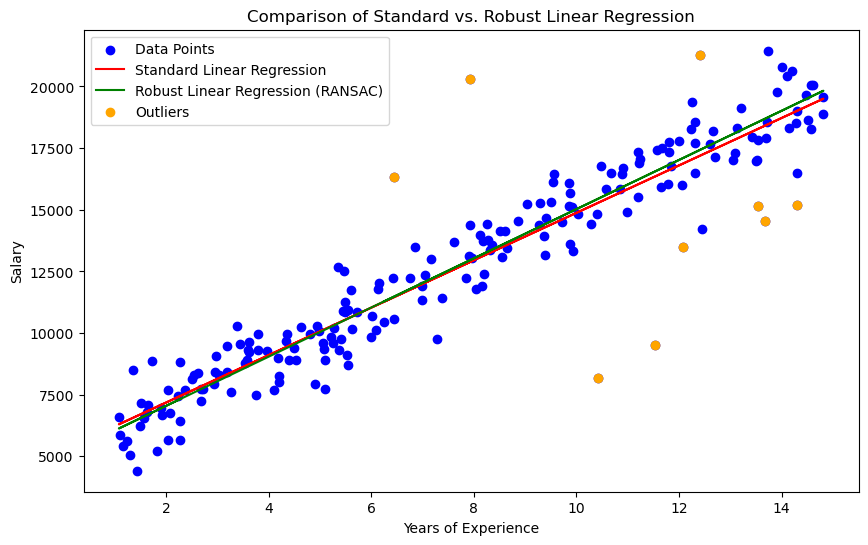


INTERPRETATION 

The Standard Linear Regression model (red line) is heavily influenced by the outliers, leading to a suboptimal fit to the data.

In contrast, the Robust Linear Regression model using RANSAC (green line) provides a more reliable estimate of the underlying relationship between 'Years of Experience' and 'Salary' by downweighting the effect of outliers.

RANSAC helps in identifying the inliers and outliers in the dataset and fits the model using the inliers, resulting in a more robust regression line.


In [9]:
#QUESTION 4:Simple Linear Regression with Outliers
import numpy as np
from sklearn.linear_model import RANSACRegressor, LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Generate dataset with outliers
np.random.seed(42)


# Generate data without outliers
X = np.random.uniform(low=1, high=15, size=180)
Y = 1000*X + 5000 + np.random.normal(loc=0, scale=1000, size=180)


# Define your dataset
data = {
    'Years of Experience': X,
    'Salary': Y
}

df = pd.DataFrame(data)

# Set option to display all rows
pd.set_option('display.max_rows', None)

# Display all rows of the dataset
print(df)

# Introduce outliers
outlier_X = np.random.uniform(low=1, high=15, size=20)
outlier_Y = 1000*outlier_X + 5000 + np.random.normal(loc=0, scale=5000, size=20)

# Combine data with outliers
X = np.concatenate((X, outlier_X))
Y = np.concatenate((Y, outlier_Y))

# Standard Linear Regression
model = LinearRegression()
model.fit(X.reshape(-1, 1), Y)
Y_pred = model.predict(X.reshape(-1, 1))

# Robust Linear Regression using RANSAC
ransac = RANSACRegressor(LinearRegression())
ransac.fit(X.reshape(-1, 1), Y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
Y_pred_ransac = ransac.predict(X.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X, Y_pred, color='red', label='Standard Linear Regression')
plt.plot(X[inlier_mask], Y_pred_ransac[inlier_mask], color='green', label='Robust Linear Regression (RANSAC)')
plt.scatter(X[outlier_mask], Y[outlier_mask], color='orange', label='Outliers')
plt.title('Comparison of Standard vs. Robust Linear Regression')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.show()


print("""
INTERPRETATION 

The Standard Linear Regression model (red line) is heavily influenced by the outliers, leading to a suboptimal fit to the data.

In contrast, the Robust Linear Regression model using RANSAC (green line) provides a more reliable estimate of the underlying relationship between 'Years of Experience' and 'Salary' by downweighting the effect of outliers.

RANSAC helps in identifying the inliers and outliers in the dataset and fits the model using the inliers, resulting in a more robust regression line.""")

#NOTES
#This code will generate a custom dataset with outliers, apply both standard linear regression and robust linear regression (RANSAC), and plot the results for comparison. You can observe how the robust model handles outliers better compared to the standard linear regression model.

